# Does the amount of Rainfall affect the number of Dengue Cases in Singapore

### I. Problem Statement / Research Topic (2 Marks)


- Research topic: Dengue fever in Singapore


- For this project, we intend to find the correlation between the amount of rainfall and the number of dengue cases in Singapore. As Singapore experiences a tropical wet and dry climate, we always believe that dengue cases will soar in the months with high rainfall (e.g., at around the end of the year). However, we intend to see if this is indeed true by analysing past statistics. If our findings prove to be substantial, it could be used to assist in formulating health and safety meaures against Dengue in Singapore. For example, extra precaution against dengue could be set in place during the months of high rainfall.


### II. Dataset and Data Preparation (2 Marks)

Please provide the name and URL of the data portal and the name and URL of the source dataset(s) that you intend to research on. Also, where necessary, explain what datasets have you tried and why did you reject them in favour of your selected dataset?

 
Please also provide the structure of the original dataset. What is the range of values (years, categories etc.) covered? How is it provided to you (CSV, Excel etc.)? In a short paragraph, what is this dataset about?



- Name of data portal : Data.gov.sg


- URL or data portal : data.gov.sg


- Name of source dataset : Rainfall-Monthly-Total


- URL of source dataset: https://data.gov.sg/dataset/rainfall-monthly-total?view_id=be92ce92-d02e-4920-9479-ff6da87b45e8&resource_id=778814b8-1b96-404b-9ac9-68d6c00e637b 


- Brief Description: The data set provided to us is in the form of an excel sheet and it covers the total monthly rainfall statistics from January 1982 till August 2020.


- Name of source dataset : Weekly Number of Dengue and Dengue Haemorrhagic Fever Cases.


- URL of source dataset: https://data.gov.sg/dataset/weekly-number-of-dengue-and-dengue-haemorrhagic-fever-cases 


- Brief Description: The data set provided to us is also in the form of an excel sheet and it covers the weekly amount of both Dengue Haemorrhagic Fever and Dengue cases on a weekly basis from 2014-2018. 
 


### Importing Necessary Modules
Here, we import the pandas library, the matplotlib library and seaborn library

We also declare a few constant vars to use

In [1]:
import pandas as pd 
from pandas import Timestamp
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime 
import numpy as np 
import datetime

### Importing CSV Files

In [2]:
rainfall_df = pd.read_csv('rainfall-monthly-total.csv')

dengue_df = pd.read_csv('weekly-number-of-dengue-and-dengue-haemorrhagic-fever-cases.csv')

In [3]:
rainfall_df.head(10)

,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2
5,1982-06,59.5
6,1982-07,76.3
7,1982-08,169.5
8,1982-09,54.1
9,1982-10,39.3


In [4]:
display(dengue_df)

,year,eweek,type_dengue,number
0,2014,1,Dengue,436.0
1,2014,1,DHF,1.0
2,2014,2,Dengue,479.0
3,2014,2,DHF,0.0
4,2014,3,Dengue,401.0
...,...,...,...,...
525,2018,51,DHF,1.0
526,2018,52,Dengue,160.0
527,2018,52,DHF,0.0
528,2018,53,Dengue,NaN


## Cleaning and Reshaping Data for Dengue dataset

In [5]:
#dropping nan values  
dengue_df = dengue_df.dropna()

# remove DHF within type_dengue column
dengue_only = dengue_df.loc[(dengue_df['type_dengue'] == 'Dengue')]


### Splitting the dataset by year

In [6]:
#split by year
one_dengue_df = dengue_only.loc[dengue_only['year'] == 2014]
first_dengue_df = one_dengue_df.loc[dengue_only['year'] < 2015]


two_dengue_df = dengue_only.loc[dengue_only['year'] == 2015]
second_dengue_df = two_dengue_df.loc[dengue_only['year'] < 2016]


three_dengue_df = dengue_only.loc[dengue_only['year'] == 2016]
third_dengue_df = three_dengue_df.loc[dengue_only['year'] < 2017]


four_dengue_df = dengue_only.loc[dengue_only['year'] == 2017]
fourth_dengue_df = four_dengue_df.loc[dengue_only['year'] < 2018]

fith_dengue_df = dengue_only.loc[dengue_only['year'] == 2018]


### Changing the dataset from weeks into months

In [7]:
def first(x):
    if x <= 5:
        x = '2014-1'
    elif x <= 9:
        x = '2014-2'
    elif x <= 14:
        x = '2014-3'
    elif x <= 19:
        x = '2014-4'
    elif x <= 23:
        x = '2014-5'
    elif x <= 27:
        x = '2014-6'
    elif x <= 31:
        x = '2014-7'
    elif x <= 35:
        x = '2014-8'
    elif x <= 39:
        x = '2014-9'
    elif x <= 43:
        x = '2014-10'
    elif x <= 47:
        x = '2014-11'
    elif x <= 53:
        x = '2014-12'
    return x

first_dengue_df['year/ month'] = first_dengue_df['eweek'].apply(first)
first_dengue_dff = first_dengue_df.groupby(['year/ month'], as_index=False).sum()
first_dengue_dff.head()

,year/ month,year,eweek,number
0,2014-1,10070,15,1886.0
1,2014-10,8056,166,1127.0
2,2014-11,8056,182,661.0
3,2014-12,12084,303,1095.0
4,2014-2,8056,30,1021.0


In [8]:
def second(y):
    if y <= 5:
        y = '2015-1'
    elif y <= 9:
        y = '2015-2'
    elif y <= 14:
        y = '2015-3'
    elif y <= 19:
        y = '2015-4'
    elif y <= 23:
        y = '2015-5'
    elif y <= 27:
        y = '2015-6'
    elif y <= 31:
        y = '2015-7'
    elif y <= 35:
        y = '2015-8'
    elif y <= 39:
        y = '2015-9'
    elif y <= 43:
        y = '2015-10'
    elif y <= 47:
        y = '2015-11'
    elif y <= 53:
        y = '2015-12'
    return y

second_dengue_df['year/ month'] = second_dengue_df['eweek'].apply(second)
second_dengue_dff = second_dengue_df.groupby('year/ month', as_index=False).sum()
second_dengue_dff.head()

,year/ month,year,eweek,number
0,2015-1,10075,15,1193.0
1,2015-10,8060,166,941.0
2,2015-11,8060,182,1000.0
3,2015-12,10075,250,1772.0
4,2015-2,8060,30,632.0


In [9]:
def third(z):
    if z <= 5:
        z = '2016-1'
    elif z <= 9:
        z = '2016-2'
    elif z <= 14:
        z = '2016-3'
    elif z <= 19:
        z = '2016-4'
    elif z <= 23:
        z = '2016-5'
    elif z <= 27:
        z = '2016-6'
    elif z <= 31:
        z = '2016-7'
    elif z <= 35:
        z = '2016-8'
    elif z <= 39:
        z = '2016-9'
    elif z <= 43:
        z = '2016-10'
    elif z <= 47:
        z = '2016-11'
    elif z <= 53:
        z = '2016-12'
    return z

third_dengue_df['year/ month'] = third_dengue_df['eweek'].apply(third)
third_dengue_dff = third_dengue_df.groupby('year/ month', as_index=False).sum()
third_dengue_dff.head()

,year/ month,year,eweek,number
0,2016-1,10080,15,2947.0
1,2016-10,8064,166,405.0
2,2016-11,8064,182,312.0
3,2016-12,10080,250,360.0
4,2016-2,8064,30,1926.0


In [10]:
def fourth(a):
    if a <= 5:
        a = '2017-1'
    elif a <= 9:
        a = '2017-2'
    elif a <= 14:
        a = '2017-3'
    elif a <= 19:
        a = '2017-4'
    elif a <= 23:
        a = '2017-5'
    elif a <= 27:
        a = '2017-6'
    elif a <= 31:
        a = '2017-7'
    elif a <= 35:
        a = '2017-8'
    elif a <= 39:
        a = '2017-9'
    elif a <= 43:
        a = '2017-10'
    elif a <= 47:
        a = '2017-11'
    elif a <= 53:
        a = '2017-12'
    return a

fourth_dengue_df['year/ month'] = fourth_dengue_df['eweek'].apply(fourth)
fourth_dengue_dff = fourth_dengue_df.groupby('year/ month', as_index=False).sum()
fourth_dengue_dff.head()

,year/ month,year,eweek,number
0,2017-1,10085,15,358.0
1,2017-10,8068,166,245.0
2,2017-11,8068,182,180.0
3,2017-12,10085,250,227.0
4,2017-2,8068,30,223.0


In [11]:
def fith(b):
    if b <= 5:
        b = '2018-1'
    elif b <= 9:
        b = '2018-2'
    elif b <= 14:
        b = '2018-3'
    elif b <= 19:
        b = '2018-4'
    elif b <= 23:
        b = '2018-5'
    elif b <= 27:
        b = '2018-6'
    elif b <= 31:
        b = '2018-7'
    elif b <= 35:
        b = '2018-8'
    elif b <= 39:
        b = '2018-9'
    elif b <= 43:
        b = '2018-10'
    elif b <= 47:
        b = '2018-11'
    elif b <= 53:
        b = '2018-12'
    return b

fith_dengue_df['year/ month'] = fith_dengue_df['eweek'].apply(fith)
fith_dengue_dff = fith_dengue_df.groupby('year/ month', as_index=False).sum()
fith_dengue_dff.head()

C:\Users\Lim Fang Howe\anaconda\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,year/ month,year,eweek,number
0,2018-1,10090,15,298.0
1,2018-10,8072,166,240.0
2,2018-11,8072,182,320.0
3,2018-12,10090,250,616.0
4,2018-2,8072,30,167.0


### Get only the relevant columns, (year/month and number)

In [12]:
first_year_dengue = first_dengue_dff.drop(columns = ['year','eweek'])

second_year_dengue = second_dengue_dff.drop(columns = ['year','eweek'])

third_year_dengue = third_dengue_dff.drop(columns = ['year','eweek'])

fourth_year_dengue = fourth_dengue_dff.drop(columns = ['year','eweek'])

fith_year_dengue = fith_dengue_dff.drop(columns = ['year','eweek'])


### What our final dengue datasets look like 

In [13]:
display(first_year_dengue)

,year/ month,number
0,2014-1,1886.0
1,2014-10,1127.0
2,2014-11,661.0
3,2014-12,1095.0
4,2014-2,1021.0
5,2014-3,1108.0
6,2014-4,1273.0
7,2014-5,1632.0
8,2014-6,2615.0
9,2014-7,2679.0


In [14]:
display(second_year_dengue)

,year/ month,number
0,2015-1,1193.0
1,2015-10,941.0
2,2015-11,1000.0
3,2015-12,1772.0
4,2015-2,632.0
5,2015-3,527.0
6,2015-4,661.0
7,2015-5,630.0
8,2015-6,961.0
9,2015-7,1032.0


In [15]:
display(third_year_dengue)

,year/ month,number
0,2016-1,2947.0
1,2016-10,405.0
2,2016-11,312.0
3,2016-12,360.0
4,2016-2,1926.0
5,2016-3,1732.0
6,2016-4,1084.0
7,2016-5,780.0
8,2016-6,884.0
9,2016-7,917.0


In [16]:
display(fourth_year_dengue)

,year/ month,number
0,2017-1,358.0
1,2017-10,245.0
2,2017-11,180.0
3,2017-12,227.0
4,2017-2,223.0
5,2017-3,184.0
6,2017-4,208.0
7,2017-5,226.0
8,2017-6,289.0
9,2017-7,229.0


In [17]:
display(fith_year_dengue)

,year/ month,number
0,2018-1,298.0
1,2018-10,240.0
2,2018-11,320.0
3,2018-12,616.0
4,2018-2,167.0
5,2018-3,172.0
6,2018-4,285.0
7,2018-5,254.0
8,2018-6,245.0
9,2018-7,191.0


### Cleaning and reshaping for Rainfall Dataset

In [18]:
#drop nan columns
rainfall_df = rainfall_df.dropna()

### Getting data only from year 2014-2018

In [19]:
# only want data from year 2014-2018, split by year
one_rainfall_df = rainfall_df.loc[rainfall_df['month'] >= '2014-01']
first_rainfall_df = one_rainfall_df.loc[rainfall_df['month'] <= '2014-12']

two_rainfall_df = rainfall_df.loc[rainfall_df['month'] >= '2015-01']
second_rainfall_df = two_rainfall_df.loc[rainfall_df['month'] <= '2015-12']

three_rainfall_df = rainfall_df.loc[rainfall_df['month'] >= '2016-01']
third_rainfall_df = three_rainfall_df.loc[rainfall_df['month'] <= '2016-12']

four_rainfall_df = rainfall_df.loc[rainfall_df['month'] >= '2017-01']
fourth_rainfall_df = four_rainfall_df.loc[rainfall_df['month'] <= '2017-12']

five_rainfall_df = rainfall_df.loc[rainfall_df['month'] >= '2018-01']
fith_rainfall_df = five_rainfall_df.loc[rainfall_df['month'] <= '2018-12']

### What our final datasets for Rainfall looks like

In [20]:
display(first_rainfall_df)

,month,total_rainfall
384,2014-01,75.4
385,2014-02,0.2
386,2014-03,66.0
387,2014-04,110.0
388,2014-05,125.8
389,2014-06,71.4
390,2014-07,148.6
391,2014-08,241.0
392,2014-09,83.6
393,2014-10,120.0


In [21]:
display(second_rainfall_df)

,month,total_rainfall
396,2015-01,79.6
397,2015-02,18.8
398,2015-03,84.4
399,2015-04,73.2
400,2015-05,89.0
401,2015-06,95.8
402,2015-07,116.8
403,2015-08,185.8
404,2015-09,61.6
405,2015-10,87.2


In [22]:
display(third_rainfall_df)

,month,total_rainfall
408,2016-01,126.6
409,2016-02,186.0
410,2016-03,6.2
411,2016-04,89.8
412,2016-05,193.8
413,2016-06,162.8
414,2016-07,168.6
415,2016-08,139.2
416,2016-09,118.9
417,2016-10,181.0


In [23]:
display(fourth_rainfall_df)

,month,total_rainfall
420,2017-01,197.6
421,2017-02,158.4
422,2017-03,136.2
423,2017-04,208.6
424,2017-05,190.0
425,2017-06,106.0
426,2017-07,79.6
427,2017-08,84.2
428,2017-09,124.4
429,2017-10,120.8


In [24]:
display(fith_rainfall_df)

,month,total_rainfall
432,2018-01,287.0
433,2018-02,14.8
434,2018-03,44.6
435,2018-04,61.2
436,2018-05,132.2
437,2018-06,182.6
438,2018-07,143.2
439,2018-08,121.6
440,2018-09,144.4
441,2018-10,234.4


## Data Visualisation

### Comparing the number of monthly dengue cases with the total monthly rainfall in 2014

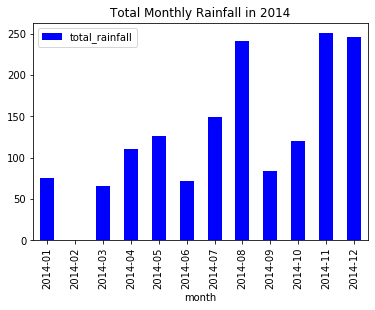

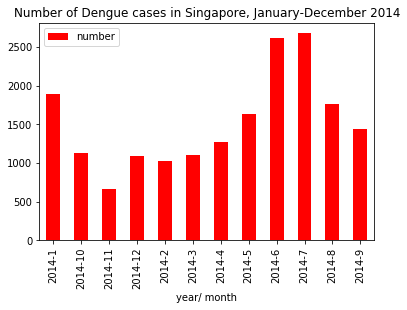

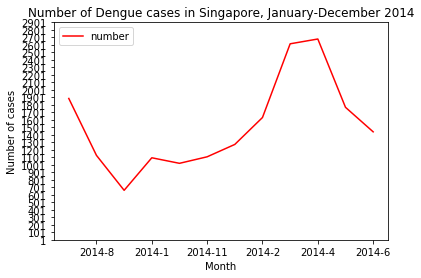

In [25]:
first_rainfall_df.plot(kind='bar',
               x='month',
               y='total_rainfall',
               color = 'blue',
               title = 'Total Monthly Rainfall in 2014')

first_year_dengue.plot(kind='bar',
               x='year/ month',
               y='number',
               color = 'red',
               title = 'Number of Dengue cases in Singapore, January-December 2014')


first_year_dengue.plot(kind='line',
               x='year/ month',
               y='number',
              color='red')
plt.title('Number of Dengue cases in Singapore, January-December 2014')
plt.xlabel('Month')
plt.ylabel("Number of cases")
plt.xticks(np.arange(1,12,2))
plt.yticks(np.arange(1,3000,100))
plt.show()

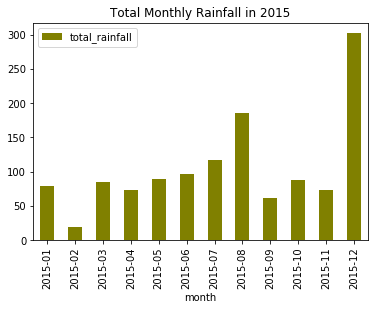

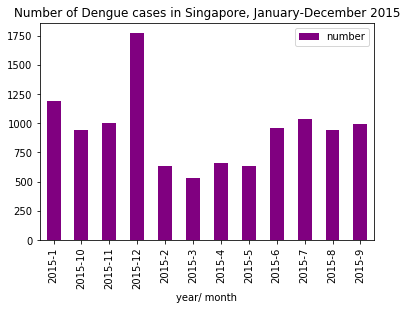

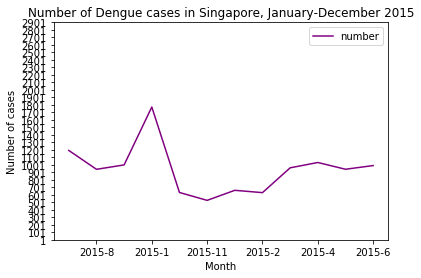

In [26]:
second_rainfall_df.plot(kind='bar',
               x='month',
               y='total_rainfall',
               color = 'olive',
               title = 'Total Monthly Rainfall in 2015')

second_year_dengue.plot(kind='bar',
               x='year/ month',
               y='number',
               color = 'purple',
               title = 'Number of Dengue cases in Singapore, January-December 2015')


second_year_dengue.plot(kind='line',
               x='year/ month',
               y='number',
              color='purple')
plt.title('Number of Dengue cases in Singapore, January-December 2015')
plt.xlabel('Month')
plt.ylabel("Number of cases")
plt.xticks(np.arange(1,12,2))
plt.yticks(np.arange(1,3000,100))
plt.show()



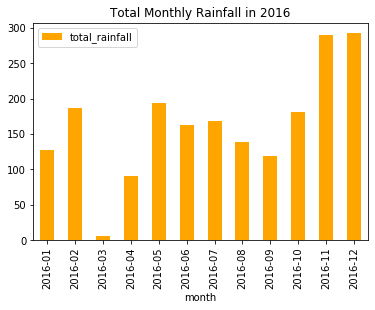

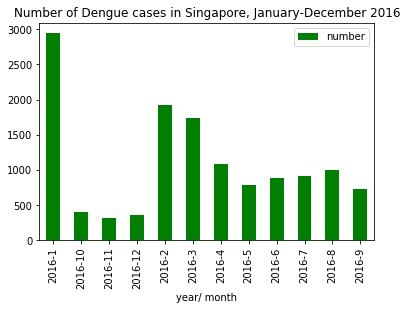

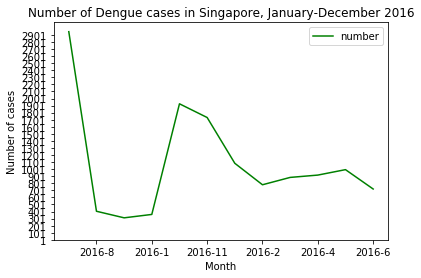

In [27]:
third_rainfall_df.plot(kind='bar',
               x='month',
               y='total_rainfall',
               color = 'orange',
               title = 'Total Monthly Rainfall in 2016')

third_year_dengue.plot(kind='bar',
               x='year/ month',
               y='number',
               color = 'green',
               title = 'Number of Dengue cases in Singapore, January-December 2016')

third_year_dengue.plot(kind='line',
               x='year/ month',
               y='number',
              color='green')
plt.title('Number of Dengue cases in Singapore, January-December 2016')
plt.xlabel('Month')
plt.ylabel("Number of cases")
plt.xticks(np.arange(1,12,2))
plt.yticks(np.arange(1,3000,100))
plt.show()

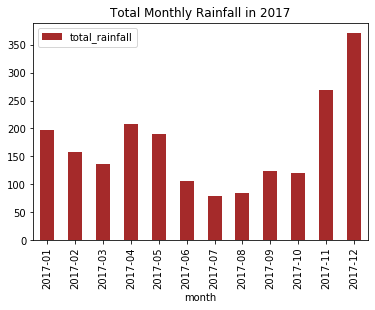

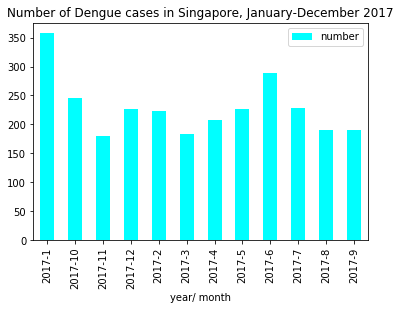

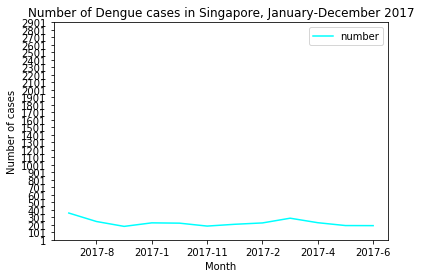

In [28]:
fourth_rainfall_df.plot(kind='bar',
               x='month',
               y='total_rainfall',
               color = 'brown',
               title = 'Total Monthly Rainfall in 2017')

fourth_year_dengue.plot(kind='bar',
               x='year/ month',
               y='number',
               color = 'cyan',
               title = 'Number of Dengue cases in Singapore, January-December 2017')

fourth_year_dengue.plot(kind='line',
               x='year/ month',
               y='number',
              color='cyan')
plt.title('Number of Dengue cases in Singapore, January-December 2017')
plt.xlabel('Month')
plt.ylabel("Number of cases")
plt.xticks(np.arange(1,12,2))
plt.yticks(np.arange(1,3000,100))
plt.show()


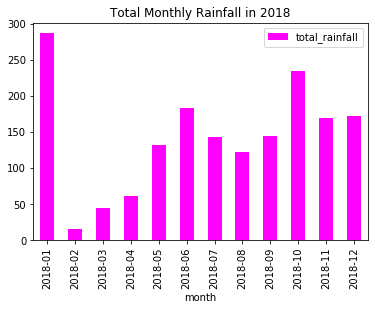

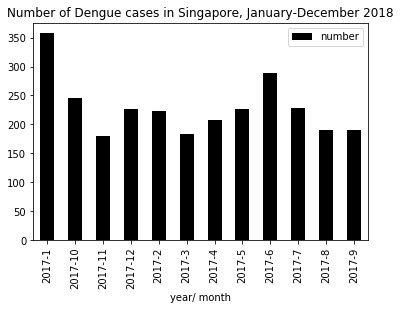

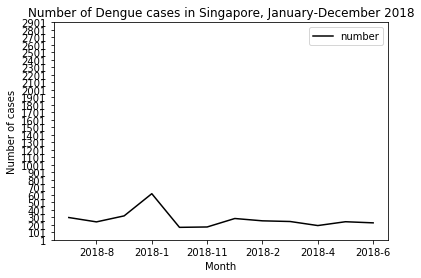

In [29]:
fith_rainfall_df.plot(kind='bar',
               x='month',
               y='total_rainfall',
               color = 'magenta',
               title = 'Total Monthly Rainfall in 2018')

fourth_year_dengue.plot(kind='bar',
               x='year/ month',
               y='number',
               color = 'black',
               title = 'Number of Dengue cases in Singapore, January-December 2018')

fith_year_dengue.plot(kind='line',
               x='year/ month',
               y='number',
              color='black')
plt.title('Number of Dengue cases in Singapore, January-December 2018')
plt.xlabel('Month')
plt.ylabel("Number of cases")
plt.xticks(np.arange(1,12,2))
plt.yticks(np.arange(1,3000,100))
plt.show()


### Attempts at Plotting

In [30]:
# fig = plt.figure(figsize=(16,6))

# ax1 = fig.add_subplot(2,2,1)
# sns.distplot(first_rainfall_df['month'], ax=ax1, color = 'blue')
# ax1.set_title('Total Monthly Rainfall in 2014')
# ax1.set_xlabel('Month')
# ax1.set_ylabel('Total Amt of Rainfall (mm)')


# ax2 = fig.add_subplot(2,2,2)
# sns.distplot(float(second_rainfall_df['month']), ax=ax2,color='red')
# ax2.set_title('Total Monthly Rainfall in 2014')
# ax2.set_xlabel('Month')
# ax2.set_ylabel('Total Amt of Rainfall (mm)')


# ax3 = fig.add_subplot(2,2,3)
# sns.countplot(first_year_dengue['year/ month'], ax=ax3, color ='blue')
# ax3.set_title('Number of Dengue cases in Singapore, January-December 2014')
# ax3.set_xlabel('Month')
# ax3.set_ylabel('Number of cases')


# ax4 = fig.add_subplot(2,2,4)
# sns.countplot(second_year_dengue['year/ month'], ax=ax4, color='red')
# ax4.set_title('Number of Dengue cases in Singapore, January-December 2014')
# ax4.set_xlabel('Month')
# ax4.set_ylabel('Number of cases')

# plt.subplots_adjust(hspace=0.5)

# plt.suptitle('Total monthly Rainfall vs Total monthly Dengue cases')


In [31]:
# fig = plt.figure(figsize=(16,6))
# ax1 = fig.add_subplot(111)

# first_year_dengue_df.plot(kind='line', x='year/ month', y='number', marker="X",
#              title="Number of Dengue cases in Singapore, January-December 2014", ax=ax1)

# plt.xticks(np.arange(1,12))
# plt.xlabel("Month")

# plt.yticks(np.arange(1, 2000, 100))
# plt.ylabel("Number of cases")

# ax1.legend(["No. of Dengue cases"], fontsize=12)

### III. Methodology (3 Marks)

What steps did you use to clean the data / transpose the data so that it appears in a usable form for analysis? Did you fill in empty datapoints, or merge datasets, or aggregate them?

What EDA techniques did you use? Why did you select these techniques? Did the results surprise you?

What data visualisation techniques did you use, where necessary? If you used data visualisation techniques, explain the graph and ensure you label them sufficiently (title, axes, legend etc.)

Where necessary, did you use a machine learning technique? If yes, what did you use and what did you intend to find out? What was the result of the machine learning technique?


Steps taken to clean the Dengue dataset

- For the dengue dataset, we started by removing all Nan values and filtering thrugh for only the type of data we required which in this case was only Dengue not DHF


- Then we went on to split the dataset into the individual years 2014-2018


- After this we reshaped it and changed the column of eweek through a function and combined it into months. We then used .groupby on column 'year/ month' and .sum()


- Lastly we selected only the relevant columns we needed 


Steps taken to clean the Rainfall dataset

- For the Rainfall dataset, we started by removing all Nan values and filtering thrugh for only the type of data we required which in this case was only Dengue not DHF


- Then we went on to split the dataset into the individual years 2014-2018


We used a line plot and bar plot for our EDA. We decided to use a line plot to observe the trend of Dengue cases in Singapore whereas for to observe the total monthly rainfall, we realised that a barchart would be best. The bar chart best shows the large differences in the amount of rainfall Singapore experiences monthly, as seen in the graph from 2014 where in 2014-02 there was only 0.2mm of rain and 2014-11 experienced 250.8mm. The line plot is best suited for the dengue cases becuase we feel that it clearly shows the increasing trend of Dengue cases in Singapore. On top of this we also plotted a bar plot for this dataset as we felt that it could enhance the clarity of the information presented. The results did surpise us because in some months where rainfall was high the number of dengue cases was actually lower, while we expected the oposite to happen.

### IV. Insights / Evluation (3 marks)
After performing EDA, what insights did you gain from the analysis? What did you learn from the analysis?
What are the possible future research efforts after showing your peers this report? What other future research would you like to do, knowing the results now?


After performing EDA we learned that in order to make any concrete analysis and predictions, you need to have much more data. The reason the number of dengue cases decreases or increases could be due to multiple reasons, not just rainfall. It could be due to temperature, habitat or even human population concentration. However, we have noticed that the amount of rainfall does ultimately lead to an increase in the number of dengue cases.


The possible future research efforts could be into finding methods to control the mosquito population during months with high rainfall. For example, government agencies can increase fumigation during these particular months or the research could be done on finding dispersal method for pesticides using the rainfall. Alternatively, this data can also be placed on a website page to allow people to view the past distribution of dengue cases in Singapore and the future predictions of when the next dengue outbreak may occur.

Knowing the results now, I would like to research on the effects the temperature, relative humidity, and location have on the number of dengue cases in Singapore. If possible I would like to be able to compile the data into a single data set and plot it out onto a map. This map will be able to show where the clusters are located in singapore and show the temperature, relative humidity and rainfall as well.

